In [62]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
import numpy as np
sbn.set()

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [21]:
len(cast.query("character == 'Superman' | character == 'Batman'").groupby(['year', 'character']).size().reset_index() \
.groupby('year').max().query("character == 'Superman'"))

29

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [22]:
len(cast.query("character == 'Superman' | character == 'Batman'").groupby(['year', 'character']).size().reset_index() \
.groupby('year').max().query("character == 'Batman'"))

17

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [115]:
actress_roles = dict(cast.query("type == 'actress'").groupby('year').size())
actor_roles = dict(cast.query("type == 'actor'").groupby('year').size())

In [116]:
actor_count = []
actress_count = []
year_list = []

for year in actress_roles:
    year_list.append(year)
    actress_count.append(actress_roles[year])
    actor_count.append(actor_roles[year])
    
year_roles = pd.DataFrame(dict(year=year_list, actress_roles=actress_count, actor_roles=actor_count))
year_roles = year_roles.set_index('year')

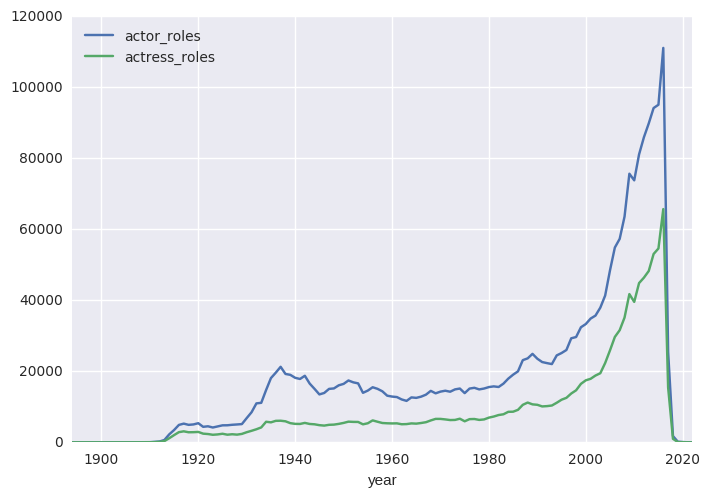

In [117]:
year_roles.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

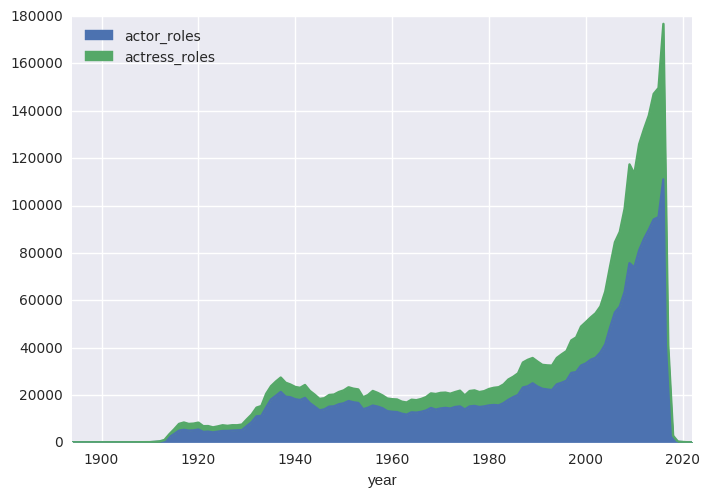

In [47]:
year_roles.plot(kind='area')

This is very different from the line plot and I am confused.

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [118]:
def role_diff(actors, actresses):
    return actors - actresses

def diff_wrapper(row):
    return role_diff(row.actor_roles, row.actress_roles)

In [119]:
year_roles['role_difference'] = year_roles.apply(diff_wrapper, axis=1)

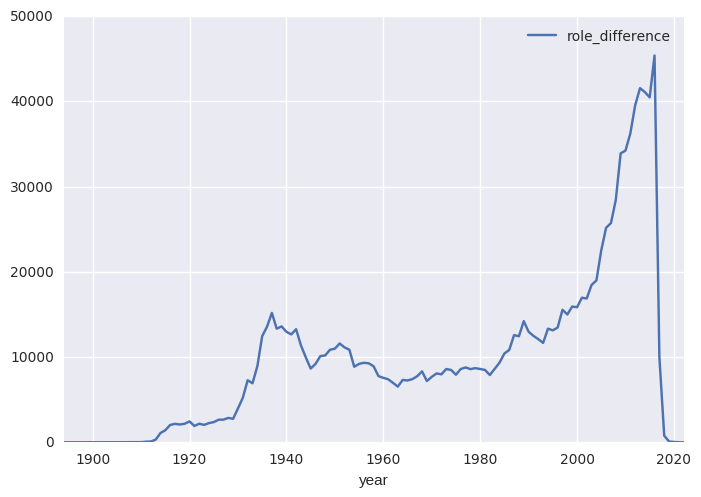

In [50]:
year_roles.plot(y='role_difference', kind='line')

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

In [120]:
def frac_act(actors, actresses):
    return actors / (actors + actresses)

def wrap_frac(row):
    return frac_act(row.actor_roles, row.actress_roles)

In [121]:
year_roles['frac_actor'] = year_roles.apply(wrap_frac, axis=1)

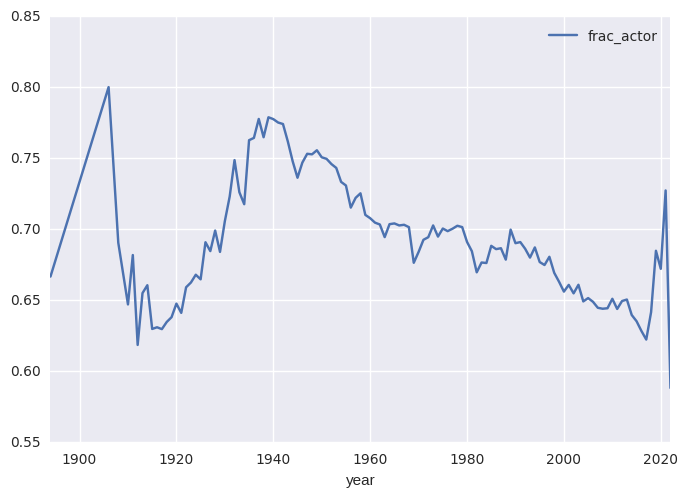

In [122]:
year_roles.plot(y='frac_actor', kind='line')

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [124]:
roles_per_year = dict(year_roles['actor_roles'])

In [132]:
year_roles = year_roles.reset_index()

In [113]:
n_two_act = dict(cast.query("type == 'actor' & n == 2").groupby('year').size())
n_one_act = dict(cast.query("type == 'actor' & n == 1").groupby('year').size())
n_tree_act = dict(cast.query("type == 'actor' & n == 3").groupby('year').size())

In [128]:
one_frac_n = []
two_frac_n = []
three_frac_n = []
years = []

for year in roles_per_year:
    years.append(year)
    try:
        one_frac_n.append(n_one_act[year] / roles_per_year[year])
    except KeyError:
        one_frac_n.append(0)
    try:
        two_frac_n.append(n_two_act[year] / roles_per_year[year])
    except KeyError:
            two_frac_n.append(0)
    try:
        three_frac_n.append(n_tree_act[year] / roles_per_year[year])
    except KeyError:
        three_frac_n.append(0)
    
frac_years = pd.DataFrame(dict(year=years, frac_one=one_frac_n, frac_two=two_frac_n, frac_three=three_frac_n))
frac_years.head()

,frac_one,frac_three,frac_two,year
0,0.000000,0.000000,0.000000,1894
1,0.083333,0.000000,0.083333,1906
2,0.034483,0.068966,0.068966,1908
3,0.022727,0.068182,0.045455,1910
4,0.118519,0.111111,0.103704,1911


In [135]:
year_roles = year_roles.merge(frac_years)

In [136]:
year_roles = year_roles.set_index('year')

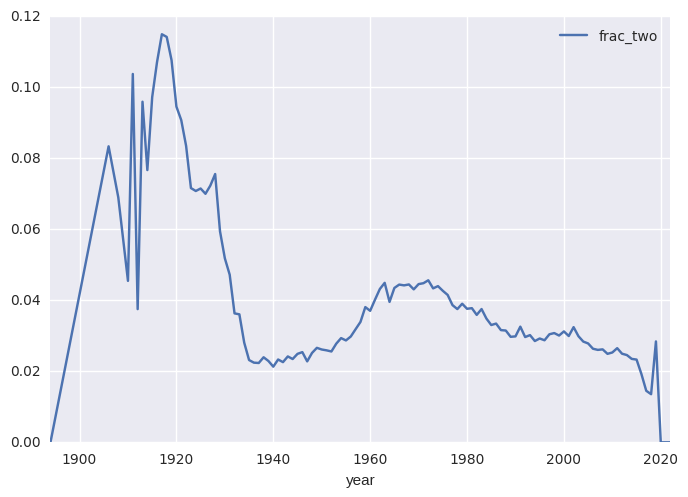

In [137]:
year_roles.plot(y='frac_two', kind='line')

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

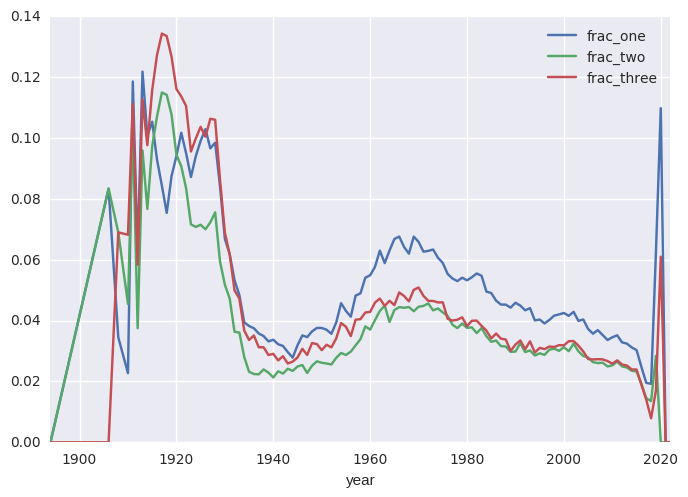

In [139]:
year_roles[['frac_one', 'frac_two', 'frac_three']].plot()